In [3]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score


In [4]:
#Load IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


In [5]:
# Example showing how to access reviews and labels
print("Review (as indices):", X_train[100])
print("Label:", y_train[100])


Review (as indices): [1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]
Label: 0


In [6]:
# You can convert the indices back to words using the word_index dictionary
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
print("\nDecoded Review:", decoded_review)




Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have d

In [7]:
# Preprocess the data
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)


In [8]:
# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])


In [9]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10


782/782 [==============================] - 118s 146ms/step - loss: 0.4291 - accuracy: 0.7891 - val_loss: 0.3543 - val_accuracy: 0.8483
Epoch 2/10
782/782 [==============================] - 99s 126ms/step - loss: 0.2656 - accuracy: 0.8931 - val_loss: 0.3789 - val_accuracy: 0.8426
Epoch 3/10
782/782 [==============================] - 119s 152ms/step - loss: 0.1974 - accuracy: 0.9240 - val_loss: 0.4319 - val_accuracy: 0.8355
Epoch 4/10
782/782 [==============================] - 124s 159ms/step - loss: 0.1485 - accuracy: 0.9450 - val_loss: 0.4279 - val_accuracy: 0.8365
Epoch 5/10
782/782 [==============================] - 115s 148ms/step - loss: 0.1132 - accuracy: 0.9599 - val_loss: 0.5573 - val_accuracy: 0.8280
Epoch 6/10
782/782 [==============================] - 85s 109ms/step - loss: 0.0882 - accuracy: 0.9699 - val_loss: 0.5474 - val_accuracy: 0.8278
Epoch 7/10
782/782 [==============================] - 53s 67ms/step - loss: 0.0821 - accuracy: 0.9704 - val_loss: 0.6758 - 

782/782 [==============================] - 13s 17ms/step - loss: 0.7409 - accuracy: 0.8154
Test accuracy: 0.8154000043869019
782/782 [==============================] - 13s 17ms/step
Precision: 85.22%
Recall: 76.32%
F1 Score: 80.52%


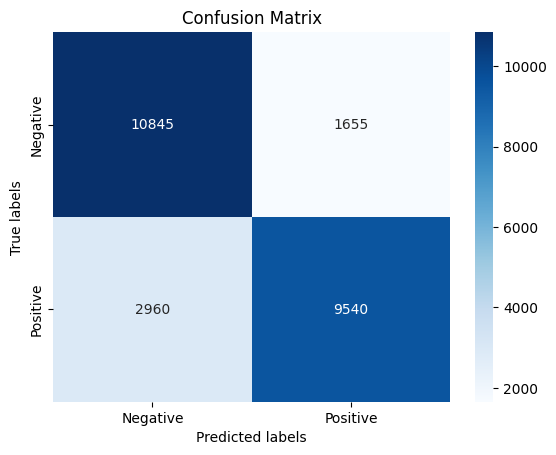

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
y_pred = model.predict(X_test)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]
cf_matrix =confusion_matrix(y_test,y_predict)
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_test,y_predict)))

# Plot results of the confusion matrix
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);
